In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import numpy as np
import pylab
import sklearn.mixture as mixture
import random
from itertools import permutations
from seaborn import heatmap, countplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [23]:
d10 = pd.read_csv("csv/altaverapaz.csv")
d20 = pd.read_csv("csv/bajaverapaz.csv")
d30 = pd.read_csv("csv/capital.csv")
d40 = pd.read_csv("csv/chimaltenango.csv")
d50 = pd.read_csv("csv/chiqui.csv")
d60 = pd.read_csv("csv/elprogreso.csv")
d70 = pd.read_csv("csv/escuintla.csv")
d80 = pd.read_csv("csv/guate.csv")
d90 = pd.read_csv("csv/huehue.csv")
d100 = pd.read_csv("csv/izabal.csv")
d110 = pd.read_csv("csv/jalapa.csv")
d120 = pd.read_csv("csv/jutiapa.csv")
d130 = pd.read_csv("csv/peten.csv")
d140 = pd.read_csv("csv/quiche.csv")
d150 = pd.read_csv("csv/reu.csv")
d160 = pd.read_csv("csv/sacatepequez.csv")
d170 = pd.read_csv("csv/sanmarcos.csv")
d180 = pd.read_csv("csv/santarosa.csv")
d190 = pd.read_csv("csv/solola.csv")
d200 = pd.read_csv("csv/suchi.csv")
d210 = pd.read_csv("csv/toto.csv")
d220 = pd.read_csv("csv/xela.csv")
d230 = pd.read_csv("csv/zacapa.csv")


datos = [d10,
d20,
d30,
d40,
d50,
d60,
d70,
d80,
d90,
d100,
d110,
d120,
d130,
d140,
d150,
d160,
d170,
d180,
d190,
d200,
d210,
d220,
d230]


In [24]:
def toLower(arr):
    return [i.lower() for i in arr]

for i in datos:
    i.columns = toLower(i.columns)

In [25]:
for i in range(len(datos)):
    print((i+10), list(datos[i].columns))
    print(" ")

10 ['na', 'codigo', 'distrito', 'departamento', 'municipio', 'establecimiento', 'direccion', 'telefono', 'supervisor', 'director', 'nivel', 'sector', 'area', 'status', 'modalidad', 'jornada', 'plan', 'departamental']
 
11 ['na', 'codigo', 'distrito', 'departamento', 'municipio', 'establecimiento', 'direccion', 'telefono', 'supervisor', 'director', 'nivel', 'sector', 'area', 'status', 'modalidad', 'jornada', 'plan', 'departamental']
 
12 ['na', 'codigo', 'distrito', 'departamento', 'municipio', 'establecimiento', 'direccion', 'telefono', 'supervisor', 'director', 'nivel', 'sector', 'area', 'status', 'modalidad', 'jornada', 'plan', 'departamental']
 
13 ['na', 'codigo', 'distrito', 'departamento', 'municipio', 'establecimiento', 'direccion', 'telefono', 'supervisor', 'director', 'nivel', 'sector', 'area', 'status', 'modalidad', 'jornada', 'plan', 'departamental']
 
14 ['na', 'codigo', 'distrito', 'departamento', 'municipio', 'establecimiento', 'direccion', 'telefono', 'supervisor', 'dire

In [26]:
import pandas as pd

# Lista de nombres de archivos
file_names = ["altaverapaz", "bajaverapaz", "capital", "chimaltenango", "chiqui", "elprogreso", "escuintla", "guate", "huehue", "izabal", "jalapa", "jutiapa", "peten", "quiche", "reu", "sacatepequez", "sanmarcos", "santarosa", "solola", "suchi", "toto", "xela", "zacapa"]

# Leer todos los archivos csv y almacenarlos en una lista de dataframes
dataframes = [pd.read_csv(f"csv/{file_name}.csv") for file_name in file_names]

# Concatenar todos los dataframes en uno solo
datos = pd.concat(dataframes)


In [27]:
datos.head()

,NA,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,NaN,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,JULIO CESAR VILLELA AMADO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,NaN,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 209.5 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,---,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
2,NaN,16-01-0140-46,16-031,ALTA VERAPAZ,COBAN,"COLEGIO ""LA INMACULADA""",7A. AVENIDA 11-109 ZONA 6,78232301,MERCEDES JOSEFINA TORRES GALVEZ,VIRGINA SOLANO SERRANO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
3,NaN,16-01-0141-46,16-005,ALTA VERAPAZ,COBAN,ESCUELA NACIONAL DE CIENCIAS COMERCIALES,2A CALLE 11-10 ZONA 2,79514215,RUDY ADOLFO TOT OCH,NaN,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
4,NaN,16-01-0142-46,16-005,ALTA VERAPAZ,COBAN,INSTITUTO NORMAL MIXTO DEL NORTE 'EMILIO ROSAL...,3A AVE 6-23 ZONA 11,79521468,RUDY ADOLFO TOT OCH,NaN,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,BILINGUE,VESPERTINA,DIARIO(REGULAR),ALTA VERAPAZ


In [30]:
datos.shape

(15375, 18)

In [31]:
datos.describe

<bound method NDFrame.describe of     NA         CODIGO DISTRITO  DEPARTAMENTO  MUNICIPIO   
0  NaN  16-01-0138-46   16-031  ALTA VERAPAZ      COBAN  \
1  NaN  16-01-0139-46   16-031  ALTA VERAPAZ      COBAN   
2  NaN  16-01-0140-46   16-031  ALTA VERAPAZ      COBAN   
3  NaN  16-01-0141-46   16-005  ALTA VERAPAZ      COBAN   
4  NaN  16-01-0142-46   16-005  ALTA VERAPAZ      COBAN   
..  ..            ...      ...           ...        ...   
90 NaN  19-09-0040-46   19-021        ZACAPA   LA UNION   
91 NaN  19-09-0048-46   19-021        ZACAPA   LA UNION   
92 NaN  19-10-0013-46   19-015        ZACAPA      HUITE   
93 NaN  19-10-1009-46   19-015        ZACAPA      HUITE   
94 NaN  19-11-0018-46   19-020        ZACAPA  SAN JORGE   

                                      ESTABLECIMIENTO   
0                                       COLEGIO COBAN  \
1                    COLEGIO PARTICULAR MIXTO VERAPAZ   
2                             COLEGIO "LA INMACULADA"   
3            ESCUELA NACIONAL

In [32]:
datos

,NA,CODIGO,DISTRITO,DEPARTAMENTO,MUNICIPIO,ESTABLECIMIENTO,DIRECCION,TELEFONO,SUPERVISOR,DIRECTOR,NIVEL,SECTOR,AREA,STATUS,MODALIDAD,JORNADA,PLAN,DEPARTAMENTAL
0,NaN,16-01-0138-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO COBAN,KM.2 SALIDA A SAN JUAN CHAMELCO ZONA 8,77945104,MERCEDES JOSEFINA TORRES GALVEZ,JULIO CESAR VILLELA AMADO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
1,NaN,16-01-0139-46,16-031,ALTA VERAPAZ,COBAN,COLEGIO PARTICULAR MIXTO VERAPAZ,KM 209.5 ENTRADA A LA CIUDAD,77367402,MERCEDES JOSEFINA TORRES GALVEZ,---,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
2,NaN,16-01-0140-46,16-031,ALTA VERAPAZ,COBAN,"COLEGIO ""LA INMACULADA""",7A. AVENIDA 11-109 ZONA 6,78232301,MERCEDES JOSEFINA TORRES GALVEZ,VIRGINA SOLANO SERRANO,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
3,NaN,16-01-0141-46,16-005,ALTA VERAPAZ,COBAN,ESCUELA NACIONAL DE CIENCIAS COMERCIALES,2A CALLE 11-10 ZONA 2,79514215,RUDY ADOLFO TOT OCH,NaN,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ALTA VERAPAZ
4,NaN,16-01-0142-46,16-005,ALTA VERAPAZ,COBAN,INSTITUTO NORMAL MIXTO DEL NORTE 'EMILIO ROSAL...,3A AVE 6-23 ZONA 11,79521468,RUDY ADOLFO TOT OCH,NaN,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,BILINGUE,VESPERTINA,DIARIO(REGULAR),ALTA VERAPAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,19-09-0040-46,19-021,ZACAPA,LA UNION,"LICEO PARTICULAR MIXTO ""JIREH""",BARRIO NUEVO,79418369.0,BERTA ALICIA LEIVA CORDON DE GARCIA,ANA MARÍA CUELLAR GUERRA DE RAMÍREZ,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,MATUTINA,DIARIO(REGULAR),ZACAPA
91,NaN,19-09-0048-46,19-021,ZACAPA,LA UNION,"LICEO PARTICULAR MIXTO "" JIREH""",BARRIO NUEVO,79418369.0,BERTA ALICIA LEIVA CORDON DE GARCIA,ANA MARÍA CUELLAR GUERRA DE RAMÍREZ,DIVERSIFICADO,PRIVADO,URBANA,ABIERTA,MONOLINGUE,SIN JORNADA,SEMIPRESENCIAL (UN DÍA A LA SEMANA),ZACAPA
92,NaN,19-10-0013-46,19-015,ZACAPA,HUITE,INSTITUTO DIVERSIFICADO,BARRIO BUENOS AIRES,47097386.0,YADIRA FERNANDA SOSA GUERRA,MARLON JOSUÉ ARCHILA LORENZO,DIVERSIFICADO,OFICIAL,URBANA,ABIERTA,MONOLINGUE,NOCTURNA,DIARIO(REGULAR),ZACAPA
93,NaN,19-10-1009-46,19-015,ZACAPA,HUITE,INSTITUTO MIXTO DE EDUCACION DIVERSIFICADA POR...,BARRIO EL CAMPO,55958103.0,YADIRA FERNANDA SOSA GUERRA,ROBIDIO PORTILLO SALGUERO,DIVERSIFICADO,COOPERATIVA,URBANA,ABIERTA,MONOLINGUE,VESPERTINA,DIARIO(REGULAR),ZACAPA


<Axes: >

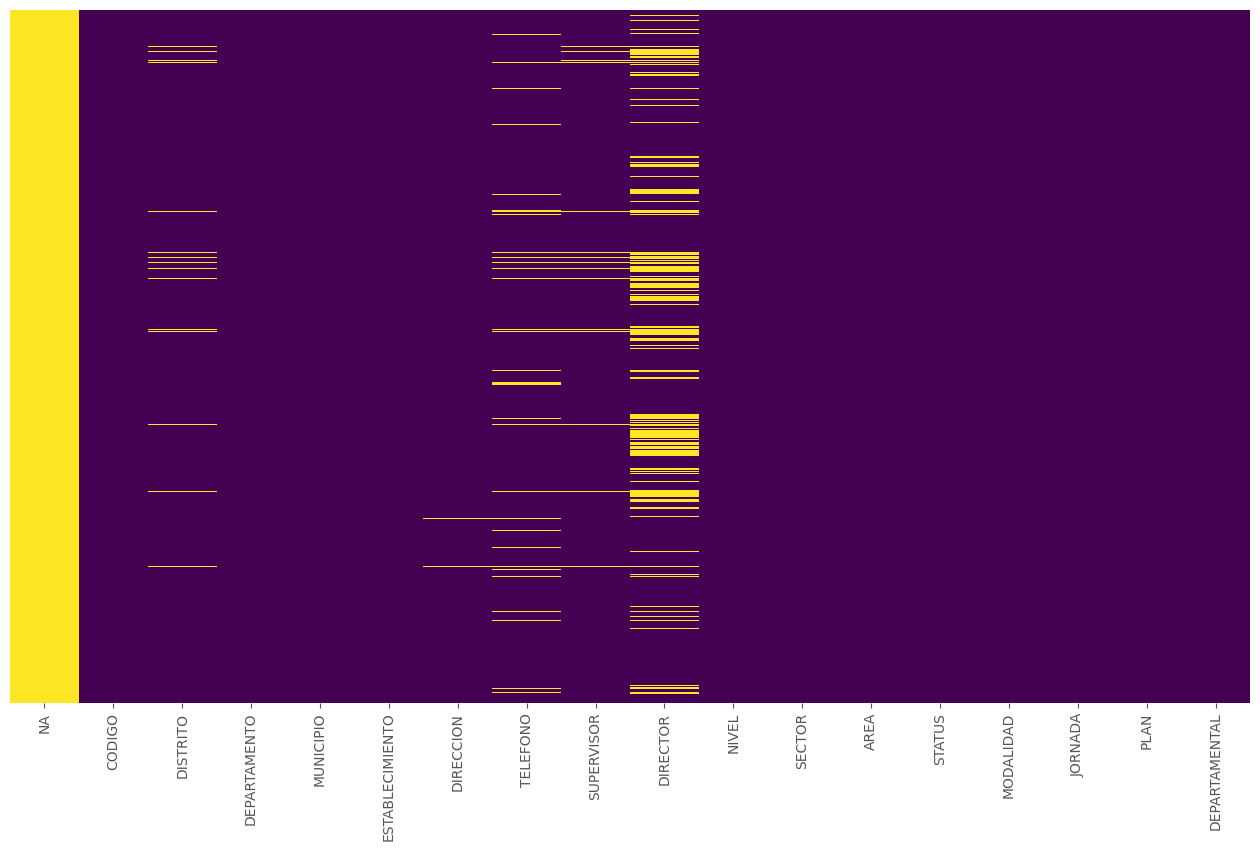

In [28]:
heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# NA: Se elimina completa
# Distrito, dirección, supervisor, director, con los NA se va a tomar como booleano para el análisis de problematica
# Telefono: se ignoran los Nan
# Todos los datos se pasan a mayúsculas
# No se vieron anomalías con los duplicados

In [6]:
#Eliminar la columna NA de los csv
import pandas as pd

files = [
    "altaverapaz.csv", "bajaverapaz.csv", "capital.csv", "chimaltenango.csv", 
    "chiqui.csv", "elprogreso.csv", "escuintla.csv", "guate.csv", "huehue.csv", 
    "izabal.csv", "jalapa.csv", "jutiapa.csv", "peten.csv", "quiche.csv", 
    "reu.csv", "sacatepequez.csv", "sanmarcos.csv", "santarosa.csv", "solola.csv", 
    "suchi.csv", "toto.csv", "xela.csv", "zacapa.csv"
]

def remove_na_column(filepath):
    df = pd.read_csv(filepath)
    if 'NA' in df.columns:
        df = df.drop(columns=['NA'])
        df.to_csv(filepath, index=False)

for file in files:
    path = "csv/" + file
    remove_na_column(path)


In [2]:
#Eliminar los NaN de la columna telefono
def remove_nan_from_telefono(filepath):
    df = pd.read_csv(filepath)
    if 'TELEFONO' in df.columns:
        df = df.dropna(subset=['TELEFONO'])
        df.to_csv(filepath, index=False)

for file in files:
    path = "csv/" + file
    remove_nan_from_telefono(path)


In [7]:
import pandas as pd
char_mapping = {
    'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u',
    'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U', 'Ü': 'U',
    'ñ': 'n', 'Ñ': 'N', 'ç': 'c', 'Ç': 'C'
}

files = [
    "altaverapaz.csv", "bajaverapaz.csv", "capital.csv", "chimaltenango.csv", 
    "chiqui.csv", "elprogreso.csv", "escuintla.csv", "guate.csv", "huehue.csv", 
    "izabal.csv", "jalapa.csv", "jutiapa.csv", "peten.csv", "quiche.csv", 
    "reu.csv", "sacatepequez.csv", "sanmarcos.csv", "santarosa.csv", "solola.csv", 
    "suchi.csv", "toto.csv", "xela.csv", "zacapa.csv"
]

def replace_accented_characters(filepath):
    df = pd.read_csv(filepath)
    
    for col in df.columns:
        if df[col].dtype == 'object':
            for char, replacement in char_mapping.items():
                df[col] = df[col].str.replace(char, replacement)
    
    df.to_csv(filepath, index=False)
    
for file in files:
    path = "csv/" + file
    replace_accented_characters(path)



#Hot encoding para tratar los NA como booleanos en las columnas de distrito, dirección, supervisor y director
def one_hot_encode_columns(filepath):
    df = pd.read_csv(filepath)
    columns_to_encode = ['DISTRITO', 'DIRECCION', 'SUPERVISOR', 'DIRECTOR']
    
    for col in columns_to_encode:
        if col in df.columns:
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=False)], axis=1)
            df.drop(columns=[col], inplace=True)
    
    df.to_csv(filepath, index=False)

for file in files:
    path = "csv/" + file
    one_hot_encode_columns(path)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '15'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '333'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '82'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(

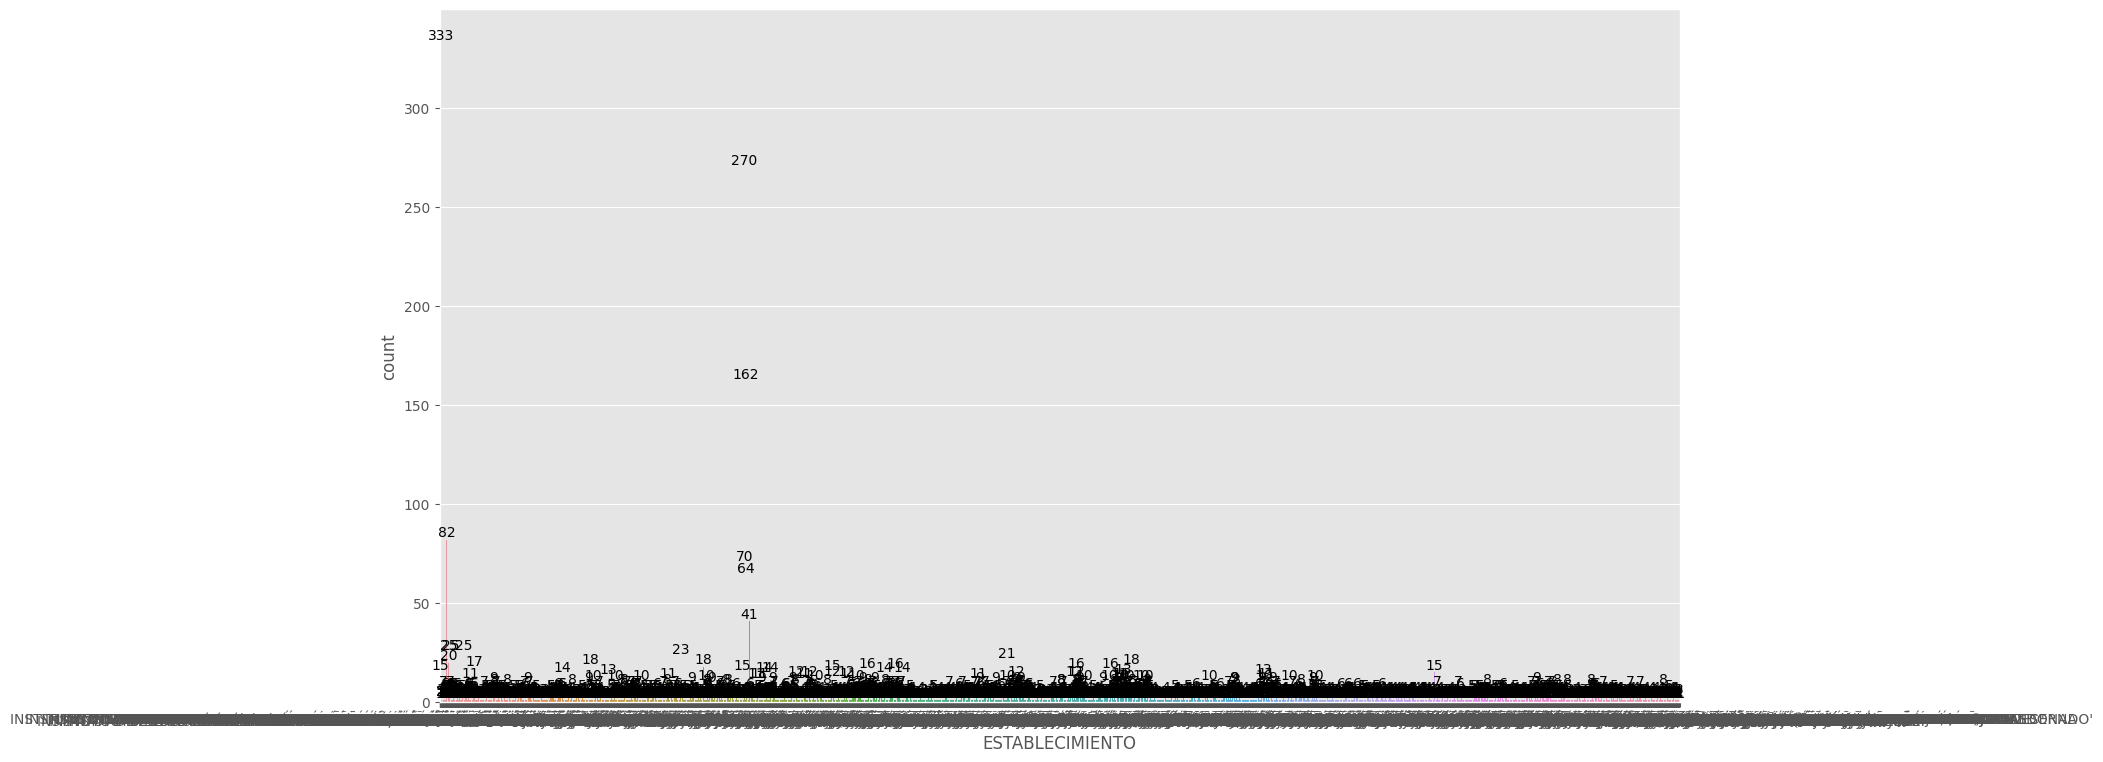

In [29]:
hist = countplot(datos, x="ESTABLECIMIENTO")
hist.bar_label(hist.containers[0])

In [33]:
from scipy.stats import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

columns = datos.columns
corr_matrix = [[] for i in range(len(columns))]

for i in range(len(columns)):
    for j in range(len(columns)):
        corr_matrix[i].append(cramers_v(datos[columns[i]], datos[columns[j]]))

ValueError: No data; `observed` has size 0.

In [ ]:
corr_df = pd.DataFrame(corr_matrix, index=columns, columns=columns)

plt.figure(figsize=(10, 10))
heatmap(corr_df,annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".2f", linecolor="black",linewidths=1,square=True)
plt.title("Correlation Heatmap")
plt.show()